# Signature Embedding: Demo

## What happens:

- load reference signatures and questioned signatures
- load a model and obtain calibration for log-likelihood ratios
- forwared all signatures through the model
- compare distances and calculate log-likelihood ratio of questioned signatures

## Imports and Helpers

In [1]:
%matplotlib inline

import chainer
import numpy as np
import os
import pickle

import nb_aux as aux
import llr

import importlib
importlib.reload(aux)
importlib.reload(llr)

<module 'llr' from '/home/hannes/Code/signature-verification/defense/llr.py'>

## Load Signatures

In [2]:
REF_DIR = "/home/hannes/Code/signature-verification/defense/reference"
QUEST_DIR = "/home/hannes/Code/signature-verification/defense/questioned"

reference  = [aux.read_image(os.path.join(REF_DIR, img))
              for img in os.listdir(REF_DIR)]
questioned = [aux.read_image(os.path.join(QUEST_DIR, img))
              for img in os.listdir(QUEST_DIR)]

### Reference Images

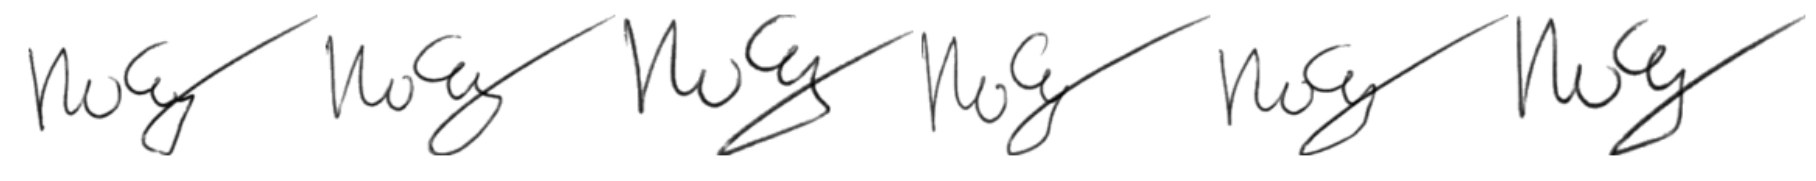

In [3]:
aux.show_images(reference)

### Questioned Images

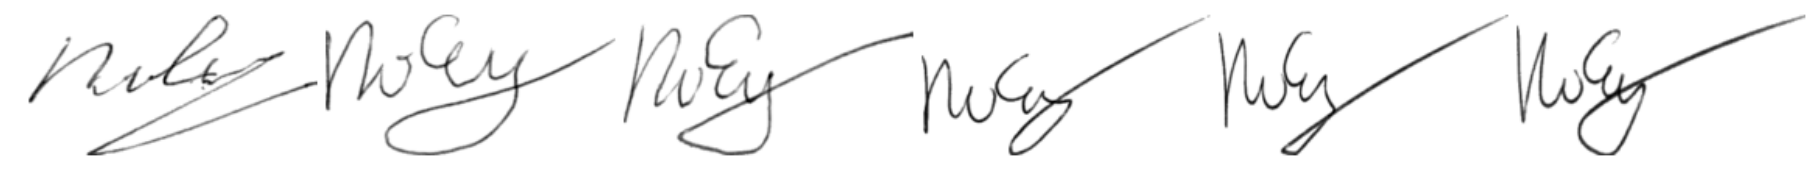

In [4]:
aux.show_images(questioned)

## Load Deep Neural Network Model

In [5]:
MODEL_PATH = "dnn.model"
model = aux.load_model(MODEL_PATH)

Model restored!


## Forward Signatures Through the DNN
<img src="embedding.png" alt="Drawing" style="width: 500px;"/>

In [6]:
ref_embedded   = aux.embed_samples(model, reference)
quest_embedded = aux.embed_samples(model, questioned)

## Compute Distances to Centroid of References

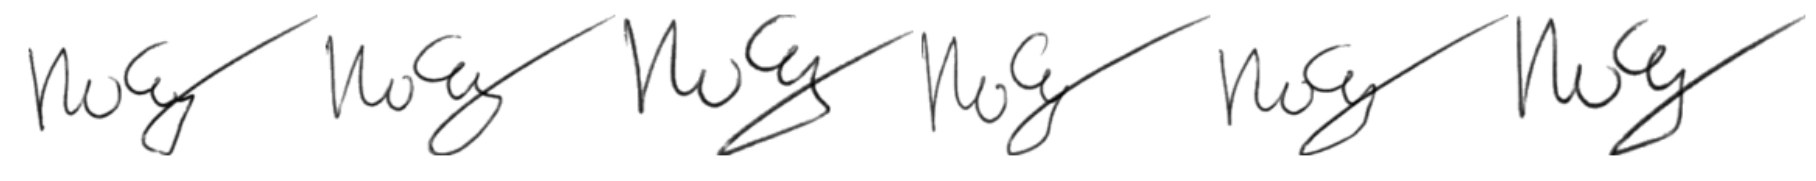

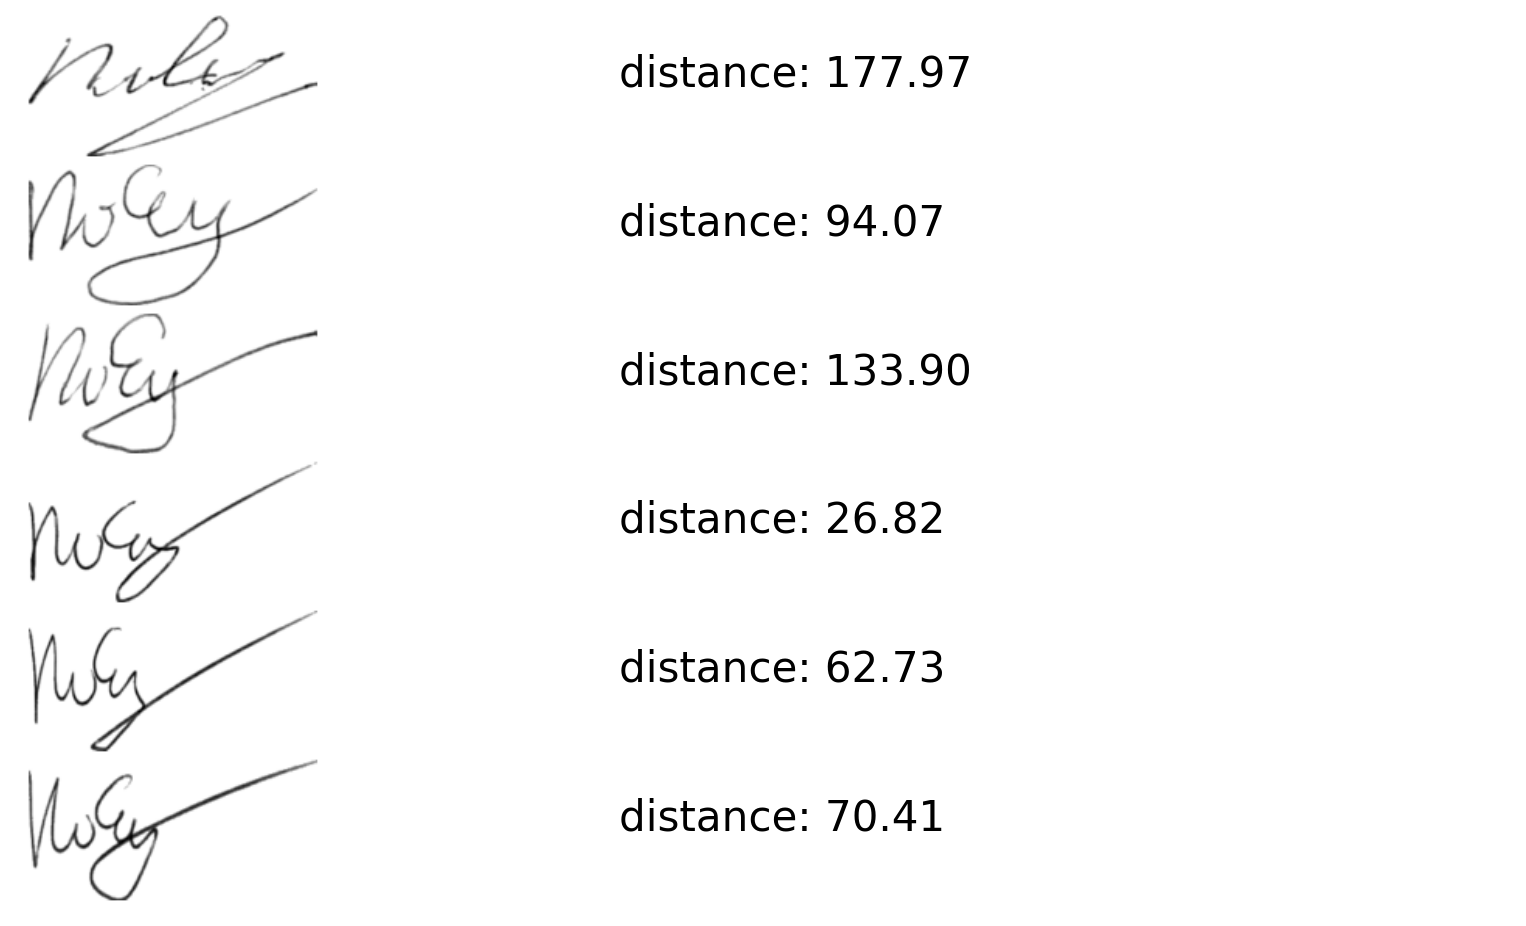

In [7]:
centroid  = np.mean(ref_embedded.data, axis=0)
distances = [aux.euclidean_distance(centroid, q)
             for q in quest_embedded]

aux.show_images(reference)
aux.show_distances(questioned, distances)

# [END OF DEMO PART 1]

## Load Log-Likelihood Ratio Calibration

In [8]:
importlib.reload(llr)

llr_helper = pickle.load(open("llr_calibration.pkl", 'rb'))
llr_helper.llr(13.14)

distance: 0.09442658103693212
1.33502441041 0.0


../defense/llr.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  return np.log(l_target / l_nontarget)


inf